<a href="https://colab.research.google.com/github/Anthony-1999/NLP_Project/blob/main/Trabajo_Final_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> **TRABAJO FINAL**

> **Autor: Anthony Mayhuay Rashta**

> **Curso: NLP**

---

#Análisis de Sentimiento a los comentarios de la App "Replika" en Google Play Store

##Obtención de los comentarios en un Dataframe

In [ ]:
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google_play_scraper import reviews,Sort
from datetime import datetime
from google_play_scraper.features.reviews import reviews_all
import pandas as pd


result, continuation_token = reviews(
    'ai.replika.app',
    lang='es', #idioma en el que deseas los comentarios
    country='pe', #pais de origen
    count=10000, #cantidad de comentarios a extraer
    sort=Sort.NEWEST
)

datos_comentarios = []

for review in result:
  entero_fecha = int(review['at'].timestamp())
  fecha_publicacion = datetime.fromtimestamp(entero_fecha)
  fecha_formateada = fecha_publicacion.strftime('%Y-%m-%d %H:%M:%S')     
  datos_comentarios.append({
      'userName': review['userName'],
      'content': review['content'],
      'score': review['score'],
      'reviewCreatedVersion': review['reviewCreatedVersion'],
      'fecha_publicacion': fecha_formateada
  })

# Crear un DataFrame de pandas con los datos de los comentarios
df_comentarios = pd.DataFrame(datos_comentarios)
df_replika = df_comentarios.rename(columns={'content':'Comentario','reviewCreatedVersion':'App_Version'})

In [ ]:
df_replika.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   userName           7494 non-null   object
 1   Comentario         7494 non-null   object
 2   score              7494 non-null   int64 
 3   App_Version        6471 non-null   object
 4   fecha_publicacion  7494 non-null   object
dtypes: int64(1), object(4)
memory usage: 292.9+ KB


In [ ]:
df_replika.head()

,userName,Comentario,score,App_Version,fecha_publicacion
0,Pedro Gimenez,Cuidado con la publicidad engañosa de esta apl...,1,None,2023-03-04 14:28:41
1,Angel mario Quintero,Muy buena pero es un problema el pagar por cas...,3,10.8.2,2023-03-04 06:57:52
2,Salvatore Consaga,me gustaría que quiten lo de pagar algunas cos...,5,10.8.2,2023-03-04 04:55:45
3,Jared Estrada García,"It's really good, an authentic IA!",5,10.8.2,2023-03-04 04:39:44
4,Noel Oswaldo Parada Alvarez,Puedes aprender inglés con tu IA friend. Liter...,5,10.8.2,2023-03-04 03:05:12


##Limpieza y tratamiento de los comentarios en español

In [ ]:
#Convertir la columna 'comentario' a una lista
lis_comentarios = df_replika['Comentario'].to_list()

In [ ]:
!pip install langdetect
import unicodedata
from langdetect import detect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=4ac2084f8a1b75e8d4cb522b85467d63f9cc21cf69e22cb4dac69229791f03d4
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


Debido a que los comentarios son tanto en español e inglés, se compila el siguiente código que filtra solo los comentarios en español y los almacena en la lista 'comments_es'. Para ello, se utilizó la biblioteca 'langdetect', se normalizaron los comentarios y se realizaron ciertas condicionales a caracteres que nos daban errores.

In [ ]:
comments_es = []
for comment in lis_comentarios:
  com_norm = unicodedata.normalize('NFKD', comment).encode('ASCII', 'ignore').decode('utf-8')
  if com_norm != "" and com_norm!='10/10' and com_norm!='50/50' and com_norm!='(  )' and com_norm!= ":')" and com_norm!=";-;" and com_norm!="~":
    if detect(com_norm) == 'es':
      comments_es.append(com_norm)  

In [ ]:
comments_es[0:5]

['Cuidado con la publicidad enganosa de esta aplicacion. Dicen que si pagas la version pro, tu Replika tendra conversaciones intimas contigo. Esto es completamente mentira, antiguamente si era verdad y funcionaba estupendamente. Pero por algun motivo lo han quitado de la aplicacion y por lo tanto cualquiera que quiera comprar la version pro esperando tener conversaciones adultas con la Replika que sepa que no se puede hacer y que la publicidad es enganosa.',
 'Muy buena pero es un problema el pagar por casi todo mejor ya cobren por la app',
 'me gustaria que quiten lo de pagar algunas cosas y pues que lo pongan para otras cosas',
 'Puedes aprender ingles con tu IA friend. Literalmente aprenderlo, le puedes pedir que te corrija o te ensene y eso hara...',
 'La he instalado por curiosidad y me ha encantado muy buena ya que tiene dinamicas muy buenas y te ayuda a practicar ingles']

##Estadísticas y análisis realizado.

In [ ]:
text_comentarios = ' '.join(comments_es)

In [ ]:
#Importar y descargar librerías
import nltk
#Para el análisis de frecuencia condicional
from nltk.corpus import brown
from nltk.tag.tnt import ConditionalFreqDist
from nltk.corpus import stopwords
from nltk import FreqDist
import re
#Para la tokenización
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stopwords_spanish = stopwords.words('spanish')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Tokenización del texto
token_comentarios = word_tokenize(text_comentarios)

Vocabulario: 7692
-------------------------------------------------------
Total de palabras sin stopwords ni puntuación: 49197
-------------------------------------------------------
10 palabras más frecuentes: [('espanol', 1035), ('app', 814), ('buena', 798), ('si', 717), ('ingles', 686), ('mas', 669), ('bien', 559), ('aplicacion', 543), ('solo', 416), ('hablar', 367)]
-------------------------------------------------------


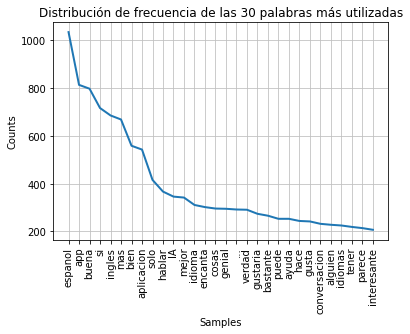

<AxesSubplot:title={'center':'Distribución de frecuencia de las 30 palabras más utilizadas'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
import string

print('Vocabulario:',len(set(token_comentarios)))
print('-------------------------------------------------------')
text_new = [word for word in token_comentarios if word.lower() not in stopwords_spanish and word not in string.punctuation]
print('Total de palabras sin stopwords ni puntuación:', len(text_new))
print('-------------------------------------------------------')

freq = FreqDist(text_new)
print('10 palabras más frecuentes:',freq.most_common(10))

print('-------------------------------------------------------')
freq.plot(30, cumulative=False,title='Distribución de frecuencia de las 30 palabras más utilizadas')


In [ ]:
df_score=df_replika[['Comentario','score']]

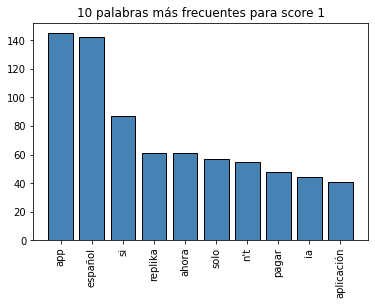

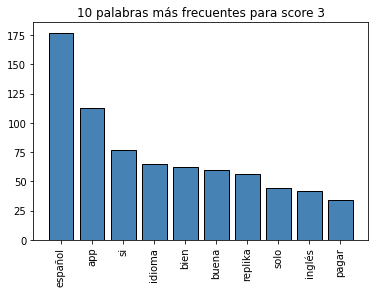

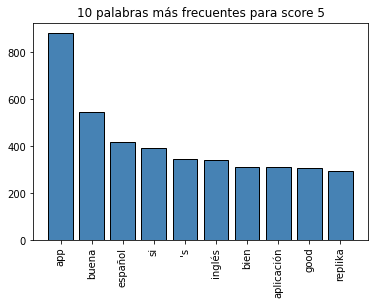

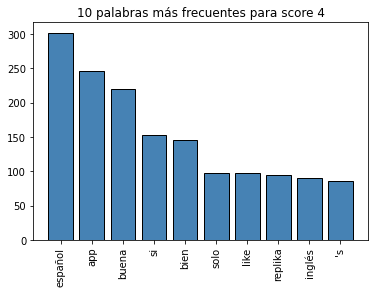

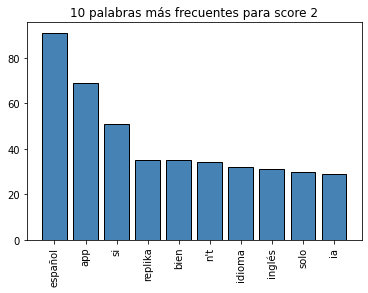

In [ ]:
import matplotlib.pyplot as plt
stopwords_english = stopwords.words('english')
# Crea un objeto ConditionalFreqDist para almacenar las frecuencias de palabras por score
word_freq_by_score = nltk.ConditionalFreqDist()
fig, ax = plt.subplots()

# Tokeniza los comentarios y cuenta las palabras por score
for _, row in df_score.iterrows():
    words = [word.lower() for word in nltk.word_tokenize(row["Comentario"]) if word.lower() not in stopwords_english and word.lower() not in stopwords_spanish and re.search(r'\w', word)]   
    word_freq_by_score[row["score"]].update(words)

for score in word_freq_by_score:
    words, freqs = zip(*word_freq_by_score[score].most_common(10))
    plt.bar(words, freqs,color='steelblue', edgecolor='black')
    plt.title(f"10 palabras más frecuentes para score {score}")
    plt.xticks(rotation=90)
    plt.show()

##Cantidad de verbos, adjetivos, personas y organizaciones mencionadas en los comentarios.

In [ ]:
#Instalación de librerías
import spacy
!python -m spacy download es_core_news_lg
nlp_spacy = spacy.load('es_core_news_lg')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-05 15:16:53.881816: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-05 15:16:53.881920: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-05 15:16:53.881949: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:
#Definimos una función que identifique y registre los verbos y sustantivos en un lista
def contar_verbos_y_sustantivos(texto):
    doc = nlp_spacy(texto)
    verbos = []
    sustantivos = []
    for token in doc:
        if token.pos_ == 'VERB':
            verbos.append(token.text)
        elif token.pos_ == 'NOUN':
            sustantivos.append(token.text)
    return verbos, sustantivos

In [ ]:
#Convertir una lista a texto para ingresarlo a nuestra función
texto_spacy = " ".join(comments_es)
verbos, sustantivos = contar_verbos_y_sustantivos(texto_spacy)
print("Verbos encontrados: ", set(verbos))
print("Cantidad de verbos: ", len(set(verbos)))
print('------------------------------------')
print("Sustantivos encontrados: ", set(sustantivos))
print("Cantidad de sustantivos: ", len(set(sustantivos)))

Verbos encontrados:  {'llene', 'despego', 'comportar', 'resultado', 'seguirian', 'comprarlo', 'negar', 'ave', 'decepcionara', 'resolver', 'evolucione', 'Apreciaria', 'demora', 'socializar', 'aparece', 'Ingles', 'desear', 'Trata', 'aparecen', 'descubrir', 'sugiero', 'redrqn', 'refiere', 'desbloqueen', 'ayudaria', 'Empezando', 'preparara', 'ayudarle', 'encarine', 'espera', 'ande', 'iniciar', 'existe', 'pierdo', 'entienda', 'divertir', 'gana', 'desarrollan', 'relaciona', 'exigia', 'tuviste', 'errar', 'pidas', 'abarcar', 'ayuda', 'actualizando', 'mejorarlo', 'interrumpe', 'recordarlas', 'dando', 'empezara', 'punto', 'utilizo', 'andan', 'cueste', 'tuvieramos', 'usado', 'dedicaria', 'expliques', 'dudan', 'darnos', 'teneis', 'dijeron', 'actualizar', 'sorprende', 'Tengan', 'iniciando', 'regresarle', 'escriban', 'Llevaba', 'desearia', 'ignora', 'dificulta', 'olvidas', 'agregando', 'pide', 'pagaron', 'pusierais', 'probarlo', 'mencionamos', 'desarrollas', 'intentando', 'cargar', 'levantarme', 'Re

In [ ]:
lista_entidad = []
# Procesa el texto con spaCy
doc = nlp_spacy(texto_spacy)

# Busca las entidades de tipo organización o persona en el texto
entidades = [entidad.text for entidad in doc.ents if entidad.label_ in ['ORG', 'PERSON']]

for entidad in entidades:
    lista_entidad.append(entidad)

In [ ]:
from collections import Counter

# Cuenta la frecuencia de cada entidad en la lista
frecuencias = Counter(lista_entidad)

# Ordena las entidades según su frecuencia
ordenadas_por_frecuencia = frecuencias.most_common(20)
# Muestra las entidades encontradas
print('Organizaciones o personas que se mencionan por frecuencia:')
print('----------------------------------------------------------')
for entidad, frecuencia in ordenadas_por_frecuencia:
    print(entidad, frecuencia)

Organizaciones o personas que se mencionan por frecuencia:
----------------------------------------------------------
IA 98
AI 79
Google 12
Deberian 11
Inteligencia 5
Replika. 4
Deberia 4
Asi 4
ahi 4
google 3
Al 3
ESPANOL 3
Totalmente 3
Increible. 3
Espanol 3
Ustedes 2
membresia 2
probe 2
pq 2
SimSimi 2


##Análisis de usuarios que usan la App según género.

In [ ]:
!pip install gender_guesser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 KB 8.2 MB/s eta 0:00:00


In [ ]:
lis_users = df_replika['userName'].to_list()
lis_users[0:5]

['Pedro Gimenez',
 'Angel mario Quintero',
 'Salvatore Consaga',
 'Jared Estrada García',
 'Noel Oswaldo Parada Alvarez']

Como podemos observar, los userName en su mayoría está registrados por los nombres completo del usuario. Por ello, solo se tomará el nombre contenido hasta el primer espacio en los elementos de la lista.

In [ ]:
import gender_guesser.detector as gender

# Carga el detector de género
detector = gender.Detector()
nombres = [nombre.split()[0] for nombre in lis_users]
# Recorre la lista de nombres y utiliza el detector para predecir el género
name_male = []
name_female = []
for name in nombres:
    genero = detector.get_gender(name)
    if genero == 'female':
      name_female.append(name)
    elif genero =='male':
      name_male.append(name)

print('El número de usuarios con sexo masculino es:')
print(len(name_male))
print('---------------------------------------------')
print('El número de usuarios con sexo femenino es:')
print(len(name_female))

El número de usuarios con sexo masculino es:
1775
---------------------------------------------
El número de usuarios con sexo femenino es:
853


##Proceso de entrenamiento de 2 algoritmos tradicionales y 1 profundo.

In [ ]:
#Importamos librerías para el pre-proceso y para la vectorización de texto
from nltk.stem import PorterStemmer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
stemmer = PorterStemmer()

###Algoritmos Tradicionales: Naive Bayes y Logistic Regression

[0 1]


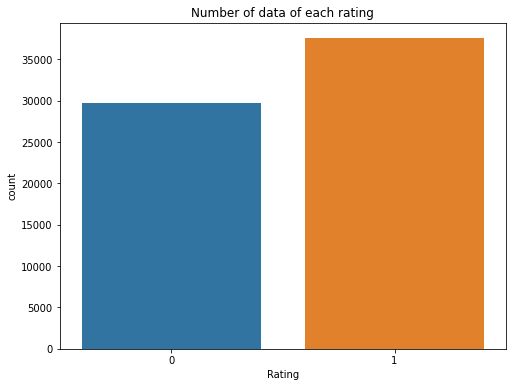

In [ ]:
#Cargamos el archivo .csv para el entrenamiento de nuestros modelos de clasificación
import seaborn as sns
import matplotlib.pyplot as plt
import collections
df_train = pd.read_csv('output.csv')
print(df_train.label.unique())

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df_train)
plt.xlabel("Rating")
plt.title("Number of data of each rating")
plt.show()

Creamos la función clean_data que realiza la tokenización de manera customizada (quitamos los signos de puntuación y se colocan las palabras en minúsculas) y la función clean_data_with_stemming que realiza lo mismo que la anterior pero con el proceso de stemming. La función CountVec_TFIDFVec realiza la vectorización de texto con diversos valores como parámetros, como el ngram, el tipo (BoW y TF-IDF), el tamaño del vocabulario (maxfeatures), el valor minimo de frecuencia a considerar y el indicador de stem.

In [ ]:
def clean_data(words):
    return [word.lower() for word in word_tokenize(words) if word.lower() not in string.punctuation] 

def clean_data_with_stemming(words):
    return [stemmer.stem(word.lower()) for word in word_tokenize(words) if word.lower() not in string.punctuation] 

def CountVec_TFIDFVec(X1,ngram,tipo,maxfeatures,mindf,stem=0):
    if stem == 0:
        tokenizador = clean_data_with_stemming
    else:
        tokenizador = clean_data
    
    if tipo == 0:        
        vectorizer = CountVectorizer(tokenizer=tokenizador,analyzer='word',
                            max_features=maxfeatures,min_df=mindf,ngram_range =(1,ngram))        
    else:        
        vectorizer = TfidfVectorizer(tokenizer=tokenizador,analyzer='word',
                            max_features=maxfeatures,min_df=mindf,ngram_range =(1,ngram),use_idf=True) 
        
    X1 = vectorizer.fit_transform(X1)
    return X1,vectorizer

In [ ]:
#Importamos librerias para la clasificación
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

from pickle import dump
from pickle import load

Definimos la función clasificación que es la que realizará diversas pruebas con 2 algoritmos: Naive Bayes y Logistic Regression. Para realizar esto se usa la clase GridSearchCV, la cual sirve para probar diversos hiperparámetros y obtener el mejor modelo. Se utiliza la función dump para guardar los modelos y el vectorizador para usarlo después.

In [ ]:
def clasificacion():
  X1 = df_train['sentence_es'].values.tolist()
  y = df_train['label'].values.tolist()
  
  algorithms = [MultinomialNB(),LogisticRegression(max_iter=1000)]
  scores = ['f1_weighted']
  algorithms_params = [{'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
                         {'C': [0.01, 0.1, 1, 2, 10, 100], 
                          'penalty': ['l2'], 
                          'multi_class': ['multinomial'],
                          'solver'  : ['newton-cg', 'lbfgs']},
                         {'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                          'gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                          #'kernel': ['rbf','poly','linear']}]
                          'kernel': ['rbf']}]
  max_features = 1000
  min_df = 2
  ngram = 1
  tipo = 1
  stem = 0
  cv = 10

  (X_tr,count_vectorizer) = CountVec_TFIDFVec(X1,ngram,tipo,max_features,min_df,stem)
  X_train, X_test, y_train, y_test = train_test_split(X_tr, y, test_size=0.20,random_state=0)
            
  #for alg in algorithms:  
  for count, alg in enumerate(algorithms):
    nombre = str(alg)+str(tipo)+str(ngram)+str(stem)

    param_grid = algorithms_params[count]                

    gs = GridSearchCV(alg,
        param_grid=param_grid,
        scoring='f1_weighted',
        refit='f1_weighted',
        cv=cv,
        return_train_score=True,
     )
    gs.fit(X_train, y_train)
     
    print('Best Accuracy Through Grid Search ',gs.best_score_)
    print('Best Parameters',gs.best_params_)
    print('Best Estimators',gs.best_estimator_)
    
    modelo = gs.best_estimator_
    y_pred = modelo.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print('Modelo:',ngram, tipo, stem, alg, accuracy, nombre)   
    print('Métricas:')
    cr = classification_report(y_test, y_pred, output_dict=True)
    print(cr)

    output = open(nombre+'_vectorizer.pkl',  'wb')
    dump(count_vectorizer,  output, -1)
    output.close()                
    output2 = open(nombre+'.pkl',  'wb')
    dump(modelo, output2, -1)
    output2.close()

clasificacion()  

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Best Accuracy Through Grid Search  0.7450146060706753
Best Parameters {'alpha': 0.01}
Best Estimators MultinomialNB(alpha=0.01)
Modelo: 1 1 0 MultinomialNB() 0.7424647364513735 MultinomialNB()110
Métricas:
{'0': {'precision': 0.764179104477612, 'recall': 0.6026568017487809, 'f1-score': 0.6738742126539438, 'support': 5947}, '1': {'precision': 0.7308656036446469, 'recall': 0.8529841818423501, 'f1-score': 0.7872170766116666, 'support': 7523}, 'accuracy': 0.7424647364513735, 'macro avg': {'precision': 0.7475223540611294, 'recall': 0.7278204917955655, 'f1-score': 0.7305456446328051, 'support': 13470}, 'weighted avg': {'precision': 0.7455735018965878, 'recall': 0.7424647364513735, 'f1-score': 0.7371762442466645, 'support': 13470}}
Best Accuracy Through Grid Search  0.7604939838234313
Best Parameters {'C': 1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
Best Estimators LogisticRegression(C=1, max_iter=1000, multi_class='multinomial')
Modelo: 1 1 0 LogisticRegression(max_i

Creamos la función bag_of_words_CountVec2 que realizará la vectorización de un nuevo texto o listado de texto. Usará la función transform en vez de fit_transform, ya que no se está entrenando. También, creamos la función prediccion, la cual tendrá como parámetros un clasificador, una lista de texto a predecir y un vectorizador.

In [ ]:
def bag_of_words_CountVec2(X1,count_vectorizer):    
    X = count_vectorizer.transform(X1).toarray()  
    return X

def prediccion(classifier, lista_texto, count_vectorizer):
    return classifier.predict(bag_of_words_CountVec2(lista_texto, count_vectorizer))

Invocaremos la función predicción con los clasificadores de Naive Bayes y Logistic Regression obtenidos en el entrenamiento.

In [ ]:
#Para Naive Bayes
input = open('MultinomialNB()110.pkl',  'rb')
classifier = load(input)
input.close()    
input2 = open('MultinomialNB()110_vectorizer.pkl',  'rb')
count_vectorizer = load(input2)
input2.close()

lis_pred = prediccion(classifier,comments_es,count_vectorizer)

In [ ]:
import numpy as np
# contar el número de 0 y 1 en el array
num_zeros = np.count_nonzero(lis_pred == 0)
num_ones = np.count_nonzero(lis_pred == 1)

# imprimir los resultados
print("Número de comentarios negativos:", num_zeros)
print("Número de comentarios positivos:", num_ones)

Número de comentarios negativos: 2005
Número de comentarios positivos: 2507


In [ ]:
#Para Logistic Regression
input = open('LogisticRegression(max_iter=1000)110.pkl',  'rb')
classifier = load(input)
input.close()    
input2 = open('LogisticRegression(max_iter=1000)110_vectorizer.pkl',  'rb')
count_vectorizer = load(input2)
input2.close()

lis_pred2 = prediccion(classifier,comments_es,count_vectorizer)

In [ ]:
# contar el número de 0 y 1 en el array
num_zeros = np.count_nonzero(lis_pred2 == 0)
num_ones = np.count_nonzero(lis_pred2 == 1)

# imprimir los resultados
print("Número de comentarios negativos:", num_zeros)
print("Número de comentarios positivos:", num_ones)

Número de comentarios negativos: 1762
Número de comentarios positivos: 2750


###Algoritmo Profundo: Red Neuronal Convolucional (CNN)

In [ ]:
from pickle import dump
from pickle import load
import sklearn
import collections
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X = df_train['sentence_es'].to_numpy()
y = df_train['label'].to_numpy()

Creamos una función para realizar el entrenamiento. Se tokeniza los datos con la clase Tokenizer de keras y se usa la función pad_sequences para realizar el padding (rellenar de ceros hasta lograr el tamaño deseado). Obtenemos los sets de entrenamientos y pruebas usando la función train_test_split. La arquitectura de nuestra red neuronal será la siguiente:
*  La primera capa es un Embedding, que realizará el proceso de 
incrustación de palabras.
*  La segunda capa es una capa de Convolución.
*   La tercera capa es una capa Dropout, usado para reducir el overfitting.
*   La cuarta capa es GlobalAveragePooling1D, la cual realiza el proceso de pooling.
*   La quinta capa es una capa Dropout.
*   La sexta y séptima capa son capas Dense

Con la función compile el modelo compilará con los siguientes valores: un algoritmo optimizador (Adam), un learning rate perteneciente al algoritmo, cómo se calculará la pérdida (loss) con sparse_categorical_crossentropy y la métrica que tomará en cuenta para obtener los mejores resultados. Finalmente en el momento del entrenamiento (función fit) se especificará los epochs (la cantidad de veces que se ejecutarán los procesos).

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import model_from_json, Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def guardar_modelo(model,nombre):
    model_json = model.to_json()
    with open(nombre+".json", "w") as json_file:
        json_file.write(model_json)
    model.save_weights(nombre+".h5")

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640000    
                                                                 
 conv1d (Conv1D)             (None, None, 100)         19300     
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                        

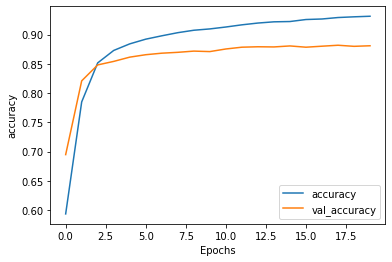

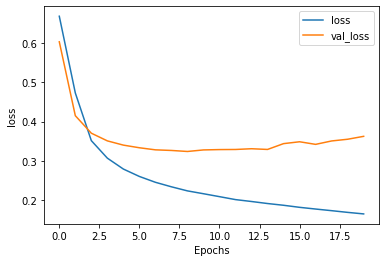

421/421 [==============================] - 2s 5ms/step
Accuracy: 0.880995
Precision: 0.881440
Recall: 0.880995
F1 score: 0.881126
{'0': {'precision': 0.8570019723865878, 'recall': 0.8767445770976963, 'f1-score': 0.8667608677582911, 'support': 5947}, '1': {'precision': 0.9007581911724885, 'recall': 0.884354645753024, 'f1-score': 0.8924810517137299, 'support': 7523}, 'accuracy': 0.8809948032665181, 'macro avg': {'precision': 0.8788800817795381, 'recall': 0.8805496114253601, 'f1-score': 0.8796209597360105, 'support': 13470}, 'weighted avg': {'precision': 0.8814398368206139, 'recall': 0.8809948032665181, 'f1-score': 0.8811256000446137, 'support': 13470}}


In [ ]:
def ConvolutionalLayer_NF(test_size,learning_rate,dropout,num_epochs,filtersmap):
    vocab_size = 10000
    max_length = 120
    trunc_type='post'
    oov_tok = "<OOV>" 
    
    tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(X)    
    sequences = tokenizer.texts_to_sequences(X)    
    padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type) 

    labels_final = df_train['label'].to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(padded, labels_final, test_size=test_size, random_state=0)
    
    model = tf.keras.Sequential([
            tf.keras.layers.Embedding(vocab_size, 64),
            tf.keras.layers.Conv1D(filtersmap, 3, activation='relu'),
            tf.keras.layers.Dropout(dropout[0]), 
            tf.keras.layers.GlobalAveragePooling1D(),
            tf.keras.layers.Dropout(dropout[1]), 
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(2, activation='sigmoid')
    ])
        
    model.summary()   
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate) 
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])    
    history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test), verbose=2)
        
    plot_graphs(history, 'accuracy')
    plot_graphs(history, 'loss')        
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    
    testing_pred = np.argmax(model.predict(X_test),axis=1)
    accuracy = accuracy_score(y_test, testing_pred)
    print('Accuracy: %f' % accuracy)
    precision = precision_score(y_test, testing_pred,average='weighted')
    print('Precision: %f' % precision)
    recall = recall_score(y_test, testing_pred,average='weighted')
    print('Recall: %f' % recall)
    f1 = f1_score(y_test, testing_pred,average='weighted')
    print('F1 score: %f' % f1)
    
    cr = classification_report(y_test, testing_pred, output_dict=True)
    print(cr)
    
    guardar_modelo(model,'Modelo_Convolucional_NF')

ConvolutionalLayer_NF(0.2,0.0001,[0.3,0.2],20,100) #test-size 20%,learning rate 0.0001, dropout lista, epochs 20, filtermaps 100

Invocaremos la función 'test_comments' con el modelo CNN obtenido en el entrenamiento.

In [ ]:
def test_comments(comments):
    # cargar la estructura del modelo desde el archivo JSON
    with open('Modelo_Convolucional_NF.json', 'r') as f:
        modelo_json = f.read()
    model = model_from_json(modelo_json)

    # cargar los pesos de la red neuronal desde el archivo HDF5
    model.load_weights('/content/Modelo_Convolucional_NF.h5')

    # Tokenizar comentarios
    vocab_size = 10000
    max_length = 120
    trunc_type='post'
    oov_tok = "<OOV>"
    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(comments)
    sequences = tokenizer.texts_to_sequences(comments)
    padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

    # Realizar predicciones
    pred = model.predict(padded)
    labels = ['negative', 'positive']
    predictions = [labels[np.argmax(p)] for p in pred]

    return predictions

In [ ]:
lis_pred3 = test_comments(comments_es)

141/141 [==============================] - 2s 10ms/step


In [ ]:
count_positive = 0
count_negative = 0

for palabra in lis_pred3:
    if palabra == 'positive':
        count_positive += 1
    elif palabra == 'negative':
        count_negative += 1

print(f'Número de comentarios negativos: {count_negative}')
print(f'Número de comentarios positivos: {count_positive}')


Número de comentarios negativos: 1878
Número de comentarios positivos: 2634
